# Project : Analyzing Naming Trends Using Python

# Problem Statement:
    
The dataset is in zipped format. We have to extract the dataset in the program,
visualize the number of male and female babies born in a particular year, and
find out popular baby names.

# Description:
    
This project not only focuses on implementing data manipulation and data
visualization using pandas library but also tests your ability to deal with real word
problem statements.

Dataset:
    
Popular baby names data provided by the Social Security Administration (SSA)
of the United States.

In [1]:
# Importing library to extract zip data
from io import BytesIO
from zipfile import ZipFile


# Importing visualizaion library
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data manipulation libraries
import numpy as np
import pandas as pd

In [2]:
z = ZipFile('names.zip').extractall('.')

Combining all files into a single DataFrame to carry out data manipulation and visualization tasks.

In [4]:
years = []

for year in range(1880, 2021):
    years.append(pd.read_csv(f'yob{year}.txt', names = ['Name', 'Sex', 'Babies']))
    years[-1]['Year'] = year

In [5]:
# Here is the first view of DataFrame

df = pd.concat(years)
df

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31448,Zykell,M,5,2020
31449,Zylus,M,5,2020
31450,Zymari,M,5,2020
31451,Zyn,M,5,2020


Making a pivot table to find out number of male and femable babies born in a particular year.

A pivot table with Index of Year, columns with Sex and values with number of Babies born in each year will help us visualize the total number of babies born in each year. Since I have put Sex into index of pivot table all the years are grouped by each year making visualiztion easier.

In [6]:
df_pivot = pd.pivot_table(data=df, index=['Year'], columns=['Sex'], values=['Babies'], aggfunc='sum')
df_pivot

Babies         
Sex         F        M
Year                  
1880    90994   110490
1881    91953   100737
1882   107847   113686
1883   112319   104625
1884   129019   114442
...       ...      ...
2016  1769164  1894723
2017  1723043  1847191
2018  1696917  1811738
2019  1673030  1788414
2020  1609171  1718248

[141 rows x 2 columns]

Making a horizontal bar plot of above insights with figure height of 30 since the total number of years are 141.

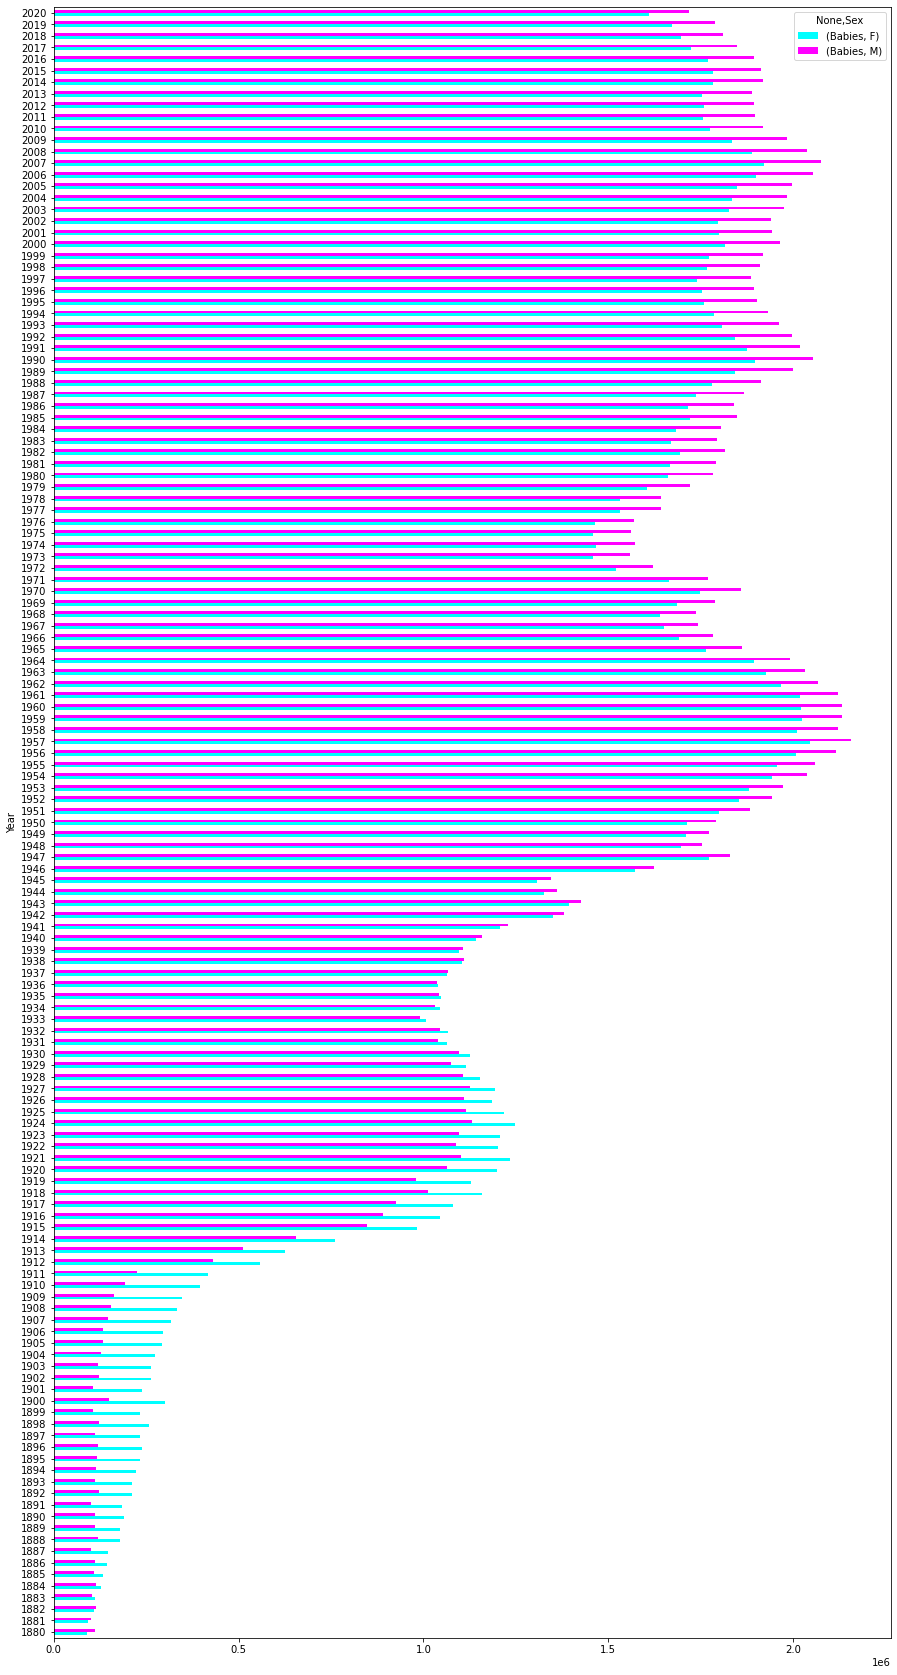

In [11]:
df_pivot.plot(kind='barh', figsize=(15,30),cmap='cool');

Here I'm analyzing baby names sorted by total number of births (Babies). Output is limited to 100 only.

In [12]:
pd.options.display.max_rows=100
sort_baby_names = df.sort_values(by='Babies', ascending=False).reset_index(drop=True)
sort_baby_names.head(100)

,Name,Sex,Babies,Year
0,Linda,F,99693,1947
1,Linda,F,96212,1948
2,James,M,94762,1947
3,Michael,M,92723,1957
4,Robert,M,91651,1947
5,Linda,F,91019,1949
6,Michael,M,90715,1956
7,Michael,M,90574,1958
8,James,M,88595,1948
9,Michael,M,88570,1954


Below is the top 100 baby names grouped by Name. It appears that total 7 number of names that makes the top 100 of baby names in all the years.

In [13]:
top_100_names = sort_baby_names.head(100)
grouped_names = top_100_names[['Name', 'Babies']].groupby('Name').sum().sort_values(by='Babies', ascending=False)
grouped_names

,Babies
Name,
James,1808548
Michael,1768250
John,1525027
Robert,1467437
David,978084
Linda,441332
Mary,219697


THANK YOU